In [1]:
import pandas as pd
#caminho onde está o arquivo python sempre barra para direita
c = '/content/drive/MyDrive/res/database/data/SE/DNSE2017.csv'

sinasc = pd.read_csv(c, dtype=str)

sinasc

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,01,00,280030,5,1,2,4,10012017,1413,1,09,10,4,3556,2,16012017,NaN,20170003,3.2.01,07022017,028,NaN,823,230075,23,3,NaN,08011993,4,01,00,01,NaN,NaN,40,9,10,NaN,1,2,1,1,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,03,01,280600,5,1,2,3,05042017,1425,1,08,09,4,2760,2,03072017,NaN,20170020,3.2.01,26072017,112,NaN,827,270400,27,3,3,06011983,4,04,03,NaN,NaN,14072016,37,8,05,03,1,2,2,1,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,NaN,NaN,280120,NaN,1,2,4,03042017,1250,1,08,09,4,3010,2,17042017,NaN,20170011,3.2.01,20042017,017,NaN,827,270030,27,3,3,21081997,4,NaN,NaN,NaN,26,NaN,NaN,NaN,08,01,1,1,2,1,NaN,3,03042017,06,0,1,NaN,11,0,5
3,4,1,2005026,270030,1,19,2,4,999992,01,NaN,280440,5,1,2,3,29042017,1615,2,08,09,4,3720,2,17052017,NaN,20170015,3.2.01,18052017,019,NaN,827,270170,27,2,8,10041998,4,01,NaN,01,NaN,08082016,37,8,04,04,1,1,1,1,2,3,29042017,04,0,1,NaN,05,1,2
4,5,1,2722429,270400,1,16,1,4,999991,00,04,280570,5,1,1,3,19042017,1014,1,09,10,4,2900,2,06062017,NaN,20170007,3.2.01,06062017,048,NaN,828,280030,28,3,1,30082000,4,00,00,00,NaN,20072016,38,8,05,05,1,2,3,3,2,4,19042017,05,0,1,NaN,03,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33862,33863,1,2115891,314480,1,31,2,5,121010,01,00,280030,4,1,2,4,22092017,0210,1,06,07,1,2735,2,31102017,NaN,20170023,3.2.01,16112017,055,NaN,828,280030,28,5,NaN,05091986,1,01,00,01,35,NaN,36,1,07,02,1,2,2,1,5,4,27092017,08,0,1,NaN,10,1,5
33863,33864,1,3137163,350610,1,26,2,4,376225,00,00,280030,5,1,2,3,15102017,0335,1,08,09,1,3230,2,13112017,NaN,20170021,3.2.01,16112017,032,NaN,827,270260,27,3,3,11111990,1,00,00,00,31,NaN,39,2,05,02,1,2,1,1,2,3,15102017,06,0,1,NaN,02,0,3
33864,33865,1,2755092,353800,1,26,1,5,999992,00,01,280030,5,1,2,4,24102017,1343,1,09,09,1,3640,2,01112017,NaN,20170045,3.2.01,08112017,015,NaN,835,354230,35,5,NaN,03101991,1,01,00,00,28,NaN,40,1,11,01,1,2,1,1,5,4,24102017,08,0,1,NaN,04,1,5
33865,33866,1,2077574,355030,1,33,1,4,999992,01,00,280580,5,1,1,4,21082017,0828,1,08,09,4,3115,2,30082017,NaN,20170036,3.2.01,04092017,014,NaN,835,355030,35,3,2,15041984,4,01,01,00,38,NaN,39,1,07,01,1,1,3,1,5,4,21082017,05,0,1,NaN,04,1,5


In [2]:
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())
sinasc.PESO = pd.to_numeric(sinasc.PESO).astype(pd.Int64Dtype())

sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())

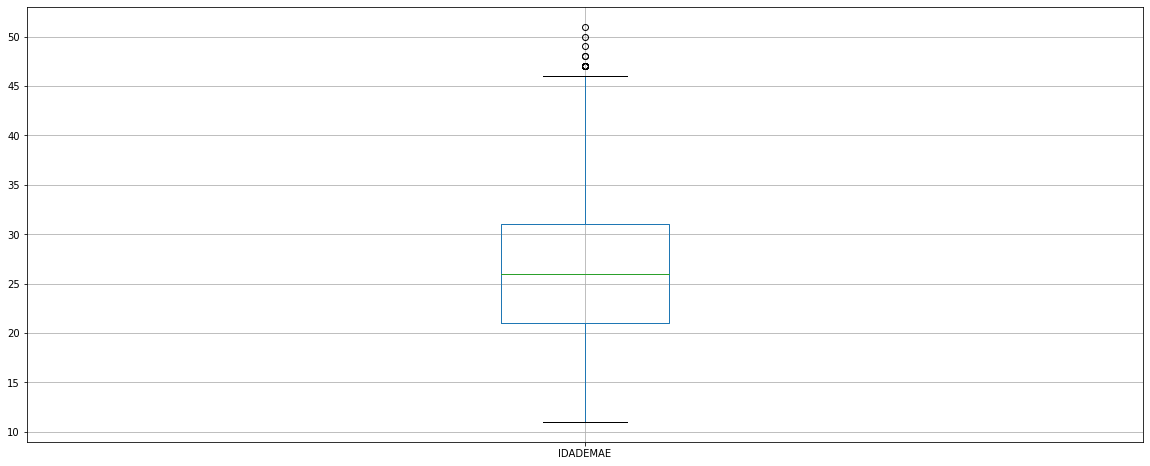

In [3]:
#boxplot da idade da mae
bp = sinasc.boxplot(column=['IDADEMAE'], figsize=(20,8))

In [6]:
#limite superior Q3 + 1.5 * (Q3-Q1)

q = sinasc.IDADEMAE.quantile([0.25, 0.75]).values
limit_inf = q[0] - 1.5 * (q[1]-q[0])
limit_sup = q[1] + 1.5 * (q[1]-q[0])

outliers = sinasc[(sinasc.IDADEMAE < limit_inf) | (sinasc.IDADEMAE > limit_sup)]
outliers

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
22,23,1,2003775,270670,1,47,5,3,999992,8,0,280640,4,1,2,2,05032017,0949,2,10,10,NaN,2915,9,16032017,NaN,20170004,3.2.01,10042017,036,NaN,827,270400,27,1,4,14011970,NaN,8,8,0,28,26062016,36,8,2,99,1,9,9,1,5,4,06032017,02,0,1,NaN,10,1,9
3110,3111,1,5714397,280030,1,47,5,2,513205,4,0,280030,5,1,1,2,05032017,0535,1,6,8,4,1762,1,14032017,Q174Q183Q188Q668,20170005,3.2.01,24052017,080,NaN,828,280300,28,1,1,09081969,4,4,4,0,<NA>,NaN,37,1,3,03,2,2,3,1,5,4,05032017,01,0,1,NaN,07,1,3
3575,3576,1,0002232,280030,1,47,1,3,999992,3,1,280530,5,1,2,4,10032017,1023,2,9,10,4,3670,2,28032017,NaN,20170005,3.2.01,24052017,075,NaN,828,280060,28,2,7,23091969,4,4,4,0,<NA>,NaN,39,1,11,02,1,2,2,1,5,4,10032017,03,0,1,NaN,03,1,5
3922,3923,1,0002232,280030,1,49,1,3,631105,2,0,280560,5,1,1,4,16032017,1249,1,9,10,1,2860,2,11042017,NaN,20170006,3.2.01,24052017,069,NaN,828,280560,28,1,4,12101967,1,2,2,0,<NA>,NaN,38,1,12,03,1,1,3,1,5,4,16032017,02,0,1,NaN,04,1,5
8371,8372,1,5714397,280030,1,48,1,3,999992,4,2,280350,5,1,1,3,25052017,1748,1,9,9,2,3290,2,14072017,NaN,20170012,3.2.01,11082017,078,NaN,828,280350,28,1,4,24111968,2,6,4,0,<NA>,NaN,40,1,4,03,1,1,3,1,5,4,25052017,02,0,1,NaN,04,1,3
12520,12521,1,2546027,280290,1,47,5,2,622020,11,2,280230,5,1,1,4,21032017,1730,2,9,10,4,3850,2,10042017,NaN,20170007,3.2.01,25042017,035,NaN,828,280050,28,1,1,27071969,4,13,13,<NA>,<NA>,NaN,41,2,7,03,1,2,3,1,5,4,21032017,01,0,1,NaN,03,1,5
17054,17055,1,3559629,280570,1,47,1,1,512105,7,<NA>,280470,NaN,1,1,3,21062017,1930,1,6,9,4,1840,1,15052018,Q559,20180016,3.2.01,17052018,330,NaN,828,280600,28,0,<NA>,15031970,4,7,7,<NA>,<NA>,NaN,<NA>,NaN,6,05,1,2,3,1,2,4,21062017,00,0,1,NaN,11,1,2
18699,18700,1,5714397,280030,1,48,1,4,999992,7,1,280480,5,1,1,4,31072017,0831,2,10,10,4,3120,2,22082017,NaN,20170014,3.2.01,29082017,029,NaN,828,280450,28,2,8,09121968,4,8,7,0,<NA>,NaN,41,1,9,05,1,1,3,1,5,4,31072017,04,0,1,NaN,04,1,2
20801,20802,1,5714397,280030,1,50,1,2,999992,10,0,280030,5,1,1,2,05092017,2005,1,9,10,4,3935,2,15092017,NaN,20170016,3.2.01,26092017,021,NaN,828,280030,28,1,1,15091966,4,10,10,0,<NA>,NaN,38,1,2,05,1,2,3,1,5,4,05092017,01,0,1,NaN,03,1,2
23171,23172,1,5714397,280030,1,47,1,4,513205,4,0,280030,5,1,2,3,18102017,0600,1,9,10,2,3660,2,25102017,NaN,20170018,3.2.01,27102017,009,NaN,828,280030,28,3,3,30081970,2,4,3,1,<NA>,NaN,41,1,4,03,1,2,1,1,5,5,18102017,06,0,1,NaN,05,1,3


In [ ]:
bins_values = sinasc.IDADEPAI.value_counts(sort=False)
hist = sinasc.hist(column="IDADEPAI", bins= sorted(bins_values.keys()), figsize=(20.8), grid=True)

for key, value in bins_values.items():
  hist[0][0].text(key+0.3, value+5, value, ha='center')

  #não consegui esse

In [17]:
idades = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE == '1') & (sinasc.IDADEPAI.notna())]
idades[['IDADEMAE','IDADEPAI']].plot(kind='bar')

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
589,590,1,6137040,280030,1,16,1,4,999992,0,0,280320,5,1,1,3,18012017,1247,2,9,10,4,2925,2,23102018,NaN,20180020,3.2.01,25102018,645,NaN,828,280030,28,2,8,19062000,4,0,0,0,25,NaN,40,1,4,04,1,2,3,1,5,4,18012017,04,0,1,NaN,01,0,2
1491,1492,1,0002593,280030,1,17,1,4,411010,0,0,280480,5,1,2,4,27012017,1747,1,9,10,4,3145,2,03022017,NaN,20170003,3.2.01,03032017,035,NaN,828,280030,28,3,2,15111999,4,0,0,0,19,NaN,38,1,7,03,1,2,1,1,5,4,27012017,05,0,1,NaN,02,0,5
1500,1501,1,0002593,280030,1,15,1,4,999992,0,0,280480,5,1,2,4,27012017,0735,1,8,9,4,2734,2,03022017,NaN,20170003,3.2.01,03032017,035,NaN,828,280030,28,2,8,10072001,4,0,0,0,22,NaN,39,1,7,03,1,2,1,1,5,4,27012017,04,0,1,NaN,02,0,5
1650,1651,1,0002593,280030,1,14,1,4,999991,0,0,280030,5,1,1,4,03022017,2354,2,9,10,4,3100,2,08022017,NaN,20170003,3.2.01,03032017,028,NaN,828,280030,28,3,1,26062002,4,0,0,0,18,NaN,39,1,8,01,1,1,3,1,2,4,03022017,05,0,1,NaN,02,0,5
1806,1807,1,0002593,280030,1,15,1,4,999991,0,0,280530,4,1,2,4,28012017,1132,1,9,9,4,3580,2,10022017,NaN,20170004,3.2.01,24052017,116,NaN,828,280030,28,2,8,21052001,4,0,0,0,22,NaN,36,1,10,03,1,2,1,1,5,4,28012017,04,0,1,NaN,10,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33003,33004,1,2420368,280550,1,15,1,4,622020,0,0,280550,3,1,1,3,13082017,0113,1,9,10,4,2240,2,25102017,NaN,20170012,3.2.01,27102017,075,NaN,828,280550,28,2,8,25082001,4,0,0,0,21,10012017,31,8,6,02,1,2,3,1,2,3,13082017,04,0,1,NaN,10,0,4
33009,33010,1,2422077,280560,1,17,1,4,622020,0,0,280560,5,1,1,4,26072017,1030,1,6,10,4,3800,2,12092017,NaN,20170013,3.2.01,14092017,050,NaN,828,280560,28,3,<NA>,15032000,4,0,1,0,22,09112016,37,8,8,01,1,2,3,1,2,5,26072017,12,0,1,NaN,03,1,5
33014,33015,1,NaN,280560,3,15,1,9,622020,<NA>,<NA>,280560,NaN,NaN,NaN,1,27082017,1300,1,<NA>,<NA>,4,<NA>,NaN,26092017,NaN,20170015,3.2.01,01112017,066,NaN,828,280560,28,9,<NA>,05092001,4,<NA>,<NA>,<NA>,24,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,0,30082017,09,0,1,NaN,11,0,9
33015,33016,1,2422077,280560,1,16,1,3,NaN,0,0,280240,5,1,1,4,01102017,1810,2,2,7,4,3050,NaN,23112017,NaN,20170016,3.2.01,06122017,066,NaN,828,280240,28,2,7,06112000,4,0,0,0,18,23122016,40,8,8,06,1,2,3,1,2,3,01102017,03,0,1,NaN,01,0,2


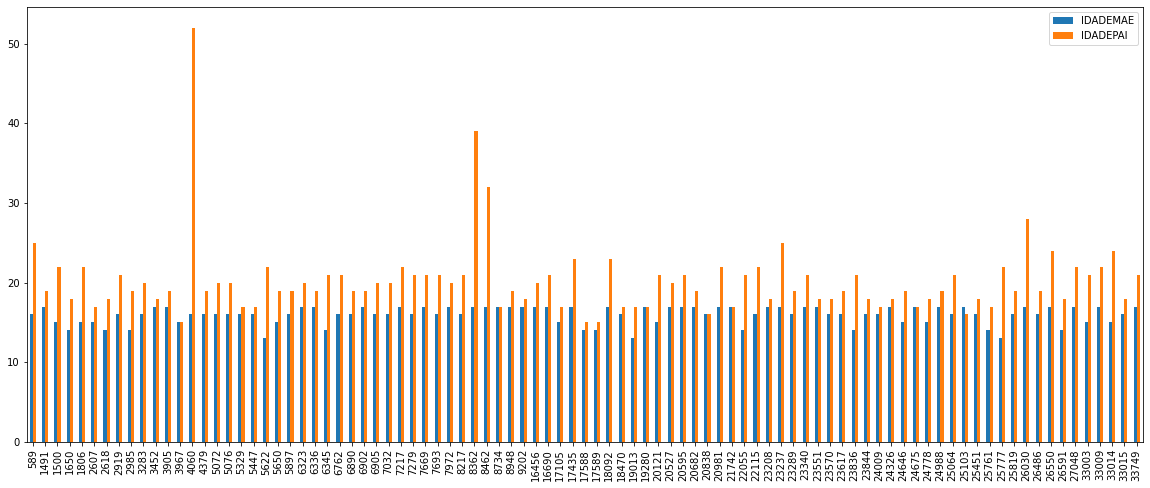

In [21]:
idades = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE == '1') & (sinasc.IDADEPAI.notna())]
idades[['IDADEMAE','IDADEPAI']].plot(kind='bar', figsize=(20,8))

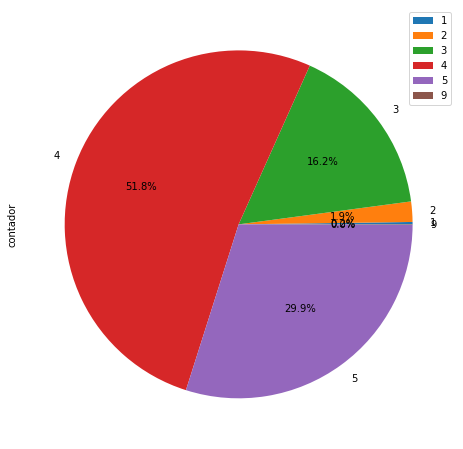

In [22]:
capital = sinasc[sinasc.CODMUNRES == '280030']
outros = sinasc[sinasc.CODMUNRES != '280030']
grupo1 = capital.groupby(by='ESCMAE').count()
pizza1 = grupo1[['contador']].plot(kind='pie', y='contador', autopct='%1.1f%%', figsize=(20,8))